# Pong Policy Training Baseline with Stable-Baselines3

This notebook implements a baseline policy training pipeline using Stable-Baselines3 (SB3) with vectorized environments, training directly on RAM observations. This serves as a comparison baseline for the V-JEPA2 and RSSM approaches.

## Key Improvements

- **Vectorized Environments**: Uses parallel environments for faster data collection
- **Optimized PPO**: Uses SB3's highly optimized PPO implementation
- **Better GPU Utilization**: Efficient batching and tensor operations

## Environment Notes

- **Google Colab**: Use GPU runtime for faster training
- **Local Apple Silicon (M1/M2)**: Will use CPU (MPS support in SB3 is limited)
- Adjust `n_envs` based on your CPU cores (4-8 is typical)


In [1]:
# Install dependencies
%pip install -q "ray[rllib]" "gymnasium[atari]" ale-py tensorboard

# For Colab: Install tensorboard extension for inline viewing
try:
    from google.colab import drive
    %load_ext tensorboard
    print("Running on Google Colab - TensorBoard extension loaded")
except:
    print("Running locally - TensorBoard can be viewed with: tensorboard --logdir <log_dir>")

print("Dependencies installed successfully!")
print("Note: Make sure you're using a GPU runtime (Runtime > Change runtime type > GPU) for faster training")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 MB 36.0 MB/s eta 0:00:00
Running on Google Colab - TensorBoard extension loaded
Dependencies installed successfully!
Note: Make sure you're using a GPU runtime (Runtime > Change runtime type > GPU) for faster training


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Running on Google Colab - TensorBoard extension loaded
Dependencies installed successfully!
Note: Make sure you're using a GPU runtime (Runtime > Change runtime type > GPU) for faster training
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted at /content/drive/MyDrive/rl-pong
CUDA available: NVIDIA A100-SXM4-40GB
CUDA memory: 42.5 GB
Models will be saved to: /content/drive/MyDrive/rl-pong/ppo_pong_ram_rllib


2025-11-24 02:11:04,044	INFO worker.py:2023 -- Started a local Ray instance.
2025-11-24 02:11:06,646	WARNING algorithm_config.py:5087 -- You configured a custom `model` config (probably through calling config.training(model=..), whereas your config uses the new API stack! In order to switch off the new API stack, set in your config: `config.api_stack(enable_rl_module_and_learner=False, enable_env_runner_and_connector_v2=False)`. If you DO want to use the new API stack, configure your model, instead, through: `config.rl_module(model_config={..})`.


Environment 'ALE/Pong-v5' registered with RLlib
Ray initialized for RLlib


(pid=29023) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(pid=29023) E0000 00:00:1763950267.229646   29023 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(pid=29023) E0000 00:00:1763950267.236259   29023 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(pid=29023) W0000 00:00:1763950267.253553   29023 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
(pid=29023) W0000 00:00:1763950267.253592   29023 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
(pid=29023) W0000 00:00:1763950267.253595   29023 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid lin

RLlib PPO configured (new API stack)
Total timesteps target: 30,000,000
Workers: 4, envs/worker: 4
Steps per update per env: 8192
Train batch size per update: 131072

Starting training...
Training for 228 updates (~30,000,000 timesteps)


(raylet) [2025-11-24 02:11:33,979 E 28967 28967] (raylet) main.cc:979: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
(SingleAgentEnvRunner pid=29023) [2025-11-24 02:11:35,820 E 29023 29111] core_worker_process.cc:837: Failed to establish connection to the metrics exporter agent. Metrics will not be exported. Exporter agent status: RpcError: Running out of retries to initialize the metrics agent. rpc_code: 14
(SingleAgentEnvRunner pid=29025) DeprecationWarning: `RLModule(config=[RLModuleConfig object])` has been deprecated. Use `RLModule(observation_space=.., action_space=.., inference_only=.., model_config=.., catalog_class=..)` instead. This will raise an error in the future!


Update     1/228 | Reward:  -20.41 | Length:  908.1 | Timesteps: 131,080.0
Update     2/228 | Reward:  -20.10 | Length:  981.6 | Timesteps: 262,157.0
Update     3/228 | Reward:  -20.17 | Length:  979.4 | Timesteps: 393,235.0
Update     4/228 | Reward:  -20.33 | Length:  963.1 | Timesteps: 524,316.0
Update     5/228 | Reward:  -19.69 | Length: 1068.9 | Timesteps: 655,394.0
Update     6/228 | Reward:  -19.35 | Length: 1153.3 | Timesteps: 786,475.0
Update     7/228 | Reward:  -19.91 | Length: 1048.9 | Timesteps: 917,554.0
Update     8/228 | Reward:  -19.82 | Length: 1054.4 | Timesteps: 1,048,632.0
Update     9/228 | Reward:  -19.30 | Length: 1182.5 | Timesteps: 1,179,711.0
Update    10/228 | Reward:  -18.85 | Length: 1210.3 | Timesteps: 1,310,790.0
Update    11/228 | Reward:  -19.01 | Length: 1228.8 | Timesteps: 1,441,868.0
Update    12/228 | Reward:  -19.16 | Length: 1220.7 | Timesteps: 1,572,947.0
Update    13/228 | Reward:  -19.45 | Length: 1163.2 | Timesteps: 1,704,024.0
Update    14/

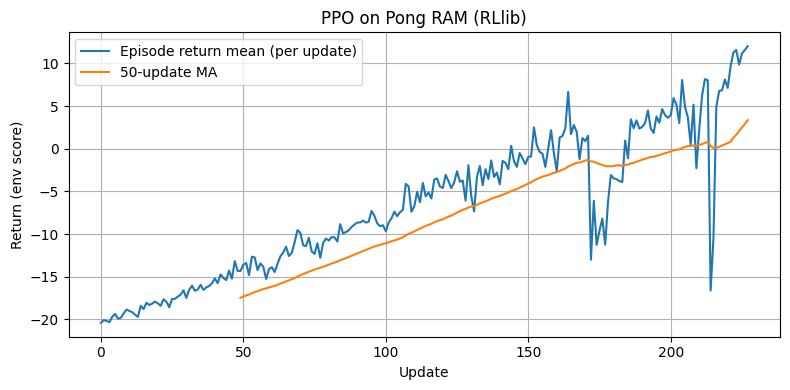


To view training progress with TensorBoard, run:
  tensorboard --logdir /content/drive/MyDrive/rl-pong/ppo_pong_ram_rllib


In [6]:
# ==========================
#  Install dependencies (run once per runtime)
# ==========================
%pip install -q "ray[rllib]" "gymnasium[atari]" ale-py tensorboard

# For Colab: Install tensorboard extension for inline viewing
try:
    from google.colab import drive
    %load_ext tensorboard
    print("Running on Google Colab - TensorBoard extension loaded")
except Exception:
    print("Running locally - TensorBoard can be viewed with: tensorboard --logdir <log_dir>")

print("Dependencies installed successfully!")
print("Note: Make sure you're using a GPU runtime (Runtime > Change runtime type > GPU) for faster training")

# ==========================
#  Imports and setup
# ==========================
import gymnasium as gym
import numpy as np
import torch
import ale_py
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.registry import register_env
import ray
import matplotlib.pyplot as plt
import os
from IPython.display import clear_output
import base64
from pathlib import Path

# Colab-specific: Mount Google Drive (optional, for saving models)
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=False)
    USE_DRIVE = True
    DRIVE_PATH = '/content/drive/MyDrive/rl-pong'
    os.makedirs(DRIVE_PATH, exist_ok=True)
    print(f"Google Drive mounted at {DRIVE_PATH}")
except Exception:
    USE_DRIVE = False
    print("Google Drive not available (running locally)")

# GPU optimization settings
if torch.cuda.is_available():
    print(f"CUDA available: {torch.cuda.get_device_name(0)}")
    print(f"CUDA memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
    torch.backends.cudnn.benchmark = True
    torch.backends.cudnn.deterministic = False

# Register ALE envs (gymnasium)
gym.register_envs(ale_py)

# ==========================
#  Hyperparameters
# ==========================
ENV_ID = "ALE/Pong-v5"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# PPO hyperparameters (roughly matching your custom implementation)
GAMMA = 0.99
GAE_LAMBDA = 0.95
CLIP_RANGE = 0.2
LR = 2.5e-4
VF_COEF = 0.5
ENT_COEF = 0.01

# Training / parallelism
STEPS_PER_UPDATE = 8192          # longer fragment (per env) for chunkier batches
NUM_SGD_ITER = 2                 # fewer PPO epochs over larger batch
NUM_WORKERS = 4                  # env runners
NUM_ENVS_PER_RUNNER = 4          # vectorized envs per runner

TOTAL_TIMESTEPS = 30_000_000     # total env steps target
MODEL_PATH = "ppo_pong_ram_rllib"
EVAL_INTERVAL = 20               # evaluate every N training iterations (optional)

if USE_DRIVE:
    MODEL_PATH = os.path.join(DRIVE_PATH, MODEL_PATH)
    os.makedirs(MODEL_PATH, exist_ok=True)
    print(f"Models will be saved to: {MODEL_PATH}")

# ==========================
#  Environment Setup for RLlib
# ==========================
from gymnasium import spaces
from gymnasium.wrappers import TransformObservation

class PongRamEnv(gym.Env):
    """
    Pong RAM environment for RLlib:
    - Uses ALE/Pong-v5 with obs_type="ram"
    - Normalizes RAM bytes to float32 in [0, 1]
    """
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 60}

    def __init__(self, config=None):
        super().__init__()
        # Make sure ALE envs are registered in this process
        gym.register_envs(ale_py)

        base_env = gym.make(ENV_ID, obs_type="ram")

        def transform_obs(obs):
            # obs is uint8 in [0, 255] -> float32 in [0, 1]
            return obs.astype(np.float32) / 255.0

        original_obs_space = base_env.observation_space

        new_obs_space = spaces.Box(
            low=np.zeros_like(original_obs_space.low, dtype=np.float32),
            high=np.ones_like(original_obs_space.high, dtype=np.float32),
            shape=original_obs_space.shape,
            dtype=np.float32,
        )

        self._env = TransformObservation(
            base_env,
            transform_obs,
            observation_space=new_obs_space,
        )

        self.observation_space = self._env.observation_space
        self.action_space = self._env.action_space

    def reset(self, *, seed=None, options=None):
        return self._env.reset(seed=seed, options=options)

    def step(self, action):
        return self._env.step(action)

    def render(self):
        return self._env.render()

    def close(self):
        self._env.close()



# Initialize Ray
ray.shutdown()  # in case it's already running
ray.init(ignore_reinit_error=True, num_cpus=NUM_WORKERS + 2)
print(f"Environment '{ENV_ID}' registered with RLlib")
print("Ray initialized for RLlib")

# ==========================
#  RLlib PPO Configuration (new API stack)
# ==========================
# Total train batch size per PPO update:
TRAIN_BATCH_SIZE = STEPS_PER_UPDATE * NUM_WORKERS * NUM_ENVS_PER_RUNNER

config = (
    PPOConfig()
    .framework("torch")
    .environment(PongRamEnv)   # <- use the class, not a string / function
    .env_runners(
        num_env_runners=NUM_WORKERS,
        num_envs_per_env_runner=NUM_ENVS_PER_RUNNER,
        rollout_fragment_length=STEPS_PER_UPDATE,
        sample_timeout_s=300,
    )
    .training(
        lr=LR,
        gamma=GAMMA,
        lambda_=GAE_LAMBDA,
        clip_param=CLIP_RANGE,
        vf_loss_coeff=VF_COEF,
        entropy_coeff=ENT_COEF,
        train_batch_size=TRAIN_BATCH_SIZE,
        num_epochs=NUM_SGD_ITER,
        model={
            "fcnet_hiddens": [128, 128],
            "fcnet_activation": "relu",
            "vf_share_layers": True,
        },
    )
    .resources(
        num_gpus=1 if torch.cuda.is_available() else 0,
    )
    .evaluation(
        evaluation_interval=EVAL_INTERVAL,
        evaluation_duration=5,
        evaluation_num_env_runners=1,   # new-style arg
        evaluation_parallel_to_training=True,
    )
)


# Build algorithm using new API stack
algo = config.build_algo()

print("RLlib PPO configured (new API stack)")
print(f"Total timesteps target: {TOTAL_TIMESTEPS:,}")
print(f"Workers: {NUM_WORKERS}, envs/worker: {NUM_ENVS_PER_RUNNER}")
print(f"Steps per update per env: {STEPS_PER_UPDATE}")
print(f"Train batch size per update: {TRAIN_BATCH_SIZE}")

# ==========================
#  Training Loop
# ==========================
print("\nStarting training...")
print("=" * 60)

results = []
episode_rewards = []
episode_lengths = []

# Number of PPO updates to reach TOTAL_TIMESTEPS (approximately)
NUM_UPDATES = TOTAL_TIMESTEPS // TRAIN_BATCH_SIZE
print(f"Training for {NUM_UPDATES} updates (~{TOTAL_TIMESTEPS:,} timesteps)")

for i in range(NUM_UPDATES):
    result = algo.train()
    results.append(result)

    env_metrics = result.get("env_runners", {}) or {}

    reward = env_metrics.get(
        "episode_return_mean",
        result.get("episode_reward_mean", 0.0),
    )
    length = env_metrics.get(
        "episode_len_mean",
        result.get("episode_len_mean", 0.0),
    )
    timesteps = env_metrics.get(
        "num_env_steps_sampled_lifetime",  # RLlib new API key
        result.get("timesteps_total", 0),
    )

    episode_rewards.append(reward)
    episode_lengths.append(length)

    print(
        f"Update {i+1:5d}/{NUM_UPDATES} | "
        f"Reward: {reward:7.2f} | "
        f"Length: {length:6.1f} | "
        f"Timesteps: {timesteps:,}"
    )

# Save final model
checkpoint_path = algo.save(MODEL_PATH)
print(f"\nTraining finished. Model saved to {checkpoint_path}")

# ==========================
#  Final Metrics + Simple Plot
# ==========================
print("\nFinal metrics (last 100 updates):")
if episode_rewards:
    import numpy as np
    print(f"  Mean reward: {np.mean(episode_rewards[-100:]):.2f}")
    print(f"  Best reward: {max(episode_rewards):.2f}")

    # quick moving-average plot
    window = min(50, len(episode_rewards))
    ma = np.convolve(
        episode_rewards, np.ones(window) / window, mode="valid"
    )

    plt.figure(figsize=(8, 4))
    plt.plot(episode_rewards, label="Episode return mean (per update)")
    plt.plot(range(window - 1, window - 1 + len(ma)), ma, label=f"{window}-update MA")
    plt.xlabel("Update")
    plt.ylabel("Return (env score)")
    plt.title("PPO on Pong RAM (RLlib)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

print("\nTo view training progress with TensorBoard, run:")
print(f"  tensorboard --logdir {MODEL_PATH}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def extract_learning_curves(results):
    """Extract timesteps, mean episode return, and mean episode length from RLlib results."""
    timesteps = []
    rewards = []
    lengths = []

    for r in results:
        env_metrics = r.get("env_runners", {}) or {}

        t = env_metrics.get(
            "num_env_steps_sampled_lifetime",
            r.get("timesteps_total", 0),
        )
        rew = env_metrics.get(
            "episode_return_mean",
            r.get("episode_reward_mean", np.nan),
        )
        leng = env_metrics.get(
            "episode_len_mean",
            r.get("episode_len_mean", np.nan),
        )

        timesteps.append(t)
        rewards.append(rew)
        lengths.append(leng)

    return np.array(timesteps), np.array(rewards), np.array(lengths)


def plot_training(results, smooth_window=10):
    """
    Plot reward (and optionally episode length) vs timesteps.
    `smooth_window` applies a moving average to the reward curve.
    """
    ts, rew, leng = extract_learning_curves(results)

    # Simple moving average smoothing for rewards
    if smooth_window > 1 and len(rew) >= smooth_window:
        kernel = np.ones(smooth_window) / smooth_window
        rew_smooth = np.convolve(rew, kernel, mode="valid")
        ts_smooth = ts[smooth_window - 1 :]
    else:
        rew_smooth = rew
        ts_smooth = ts

    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Reward curve
    ax1.plot(ts_smooth, rew_smooth, label="Mean episode reward")
    ax1.set_xlabel("Timesteps")
    ax1.set_ylabel("Reward")
    ax1.grid(True)

    # Optional: overlay episode length on secondary axis
    ax2 = ax1.twinx()
    ax2.plot(ts, leng, alpha=0.3, linestyle="--", label="Episode length")
    ax2.set_ylabel("Episode length")

    # Combine legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="lower right")

    plt.title("PPO Training on Pong (RAM)")
    plt.tight_layout()
    plt.show()


NameError: name 'avg_hist' is not defined

In [ ]:
# ==========================
#  Watch Trained Agent (RLlib)
# ==========================
def watch_agent_rllib(checkpoint_path=None, n_episodes=3, render_mode="human"):
    """
    Renders the agent playing Pong using RLlib model.
    - If `checkpoint_path` is None, loads from MODEL_PATH.
    - render_mode: 'human' for window, 'rgb_array' for frames
    """
    if checkpoint_path is None:
        checkpoint_path = MODEL_PATH

    # Load algorithm from checkpoint
    algo = config.build()
    algo.restore(checkpoint_path)
    print(f"Loaded model from {checkpoint_path}")

    # Create environment
    env = gym.make(ENV_ID, obs_type="ram", render_mode=render_mode)

    returns = []
    for ep in range(n_episodes):
        obs, info = env.reset()
        done = False
        ep_return = 0.0
        steps = 0

        while not done:
            # RLlib: compute_action returns action
            action = algo.compute_single_action(obs, explore=False)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            ep_return += reward
            steps += 1

        returns.append(ep_return)
        print(f"Episode {ep + 1}: return = {ep_return:.1f}, length = {steps}")

    env.close()
    print(f"\nMean return over {n_episodes} episodes: {np.mean(returns):.2f} ± {np.std(returns):.2f}")
    return returns

# Evaluate the trained model
# Uncomment to run:
# watch_agent_rllib(n_episodes=5)

A.L.E: Arcade Learning Environment (version 0.11.0+unknown)
[Powered by Stella]
/var/folders/7k/gy0ltxvs51sf5w1stk7h06vw0000gn/T/ipykernel_82457/789450303.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues relat

Episode 1: return = 14.0
Episode 2: return = 3.0
Episode 3: return = 16.0


In [ ]:
# ==========================
#  Run trained policy and save video
# ==========================
%pip install -q imageio[ffmpeg]

import gymnasium as gym
import numpy as np
import imageio
import os
from IPython.display import HTML
import base64

def record_pong_episode(
    algo,
    env_id="ALE/Pong-v5",
    video_path="pong_eval.mp4",
    max_steps=5000,
    seed=None,
):
    """
    Run one episode of Pong with the trained RLlib policy and save an MP4.

    - Uses obs_type='ram' (to match training) but render_mode='rgb_array'
      to grab frames for the video.
    """
    # Env with RAM obs + RGB rendering
    env = gym.make(env_id, obs_type="ram", render_mode="rgb_array")
    obs, info = env.reset(seed=seed)

    def preprocess(obs):
        # same normalization as training: uint8 [0,255] -> float32 [0,1]
        return obs.astype(np.float32) / 255.0

    frames = []
    done = False
    total_reward = 0.0
    steps = 0

    # initial frame
    frame = env.render()
    if frame is not None:
        frames.append(frame)

    while not done and steps < max_steps:
        obs_norm = preprocess(obs)

        # RLlib new API still supports compute_single_action
        action = algo.compute_single_action(obs_norm)
        # In some versions this returns (action, state, info); handle tuple
        if isinstance(action, tuple):
            action = action[0]

        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward
        steps += 1

        frame = env.render()
        if frame is not None:
            frames.append(frame)

    env.close()

    # Write MP4
    with imageio.get_writer(video_path, fps=60) as writer:
        for f in frames:
            writer.append_data(f)

    print(f"Saved video to {video_path}")
    print(f"Episode reward: {total_reward:.2f}, steps: {steps}")
    return video_path, total_reward


def show_video_inline(video_path):
    """Display the saved MP4 inline in Colab."""
    with open(video_path, "rb") as f:
        video_bytes = f.read()
    data_url = "data:video/mp4;base64," + base64.b64enc_


A.L.E: Arcade Learning Environment (version 0.11.0+unknown)
[Powered by Stella]
Game console created:
  ROM file:  /Users/lavan/miniconda3/envs/rl-pong/lib/python3.11/site-packages/ale_py/roms/pong.bin
  Cart Name: Video Olympics (1978) (Atari)
  Cart MD5:  60e0ea3cbe0913d39803477945e9e5ec
  Display Format:  AUTO-DETECT ==> NTSC
  ROM Size:        2048
  Bankswitch Type: AUTO-DETECT ==> 2K

Running ROM file...
Random seed is -408401050
/var/folders/7k/gy0ltxvs51sf5w1stk7h06vw0000gn/T/ipykernel_82457/1765489412.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be execut

Episode 1: return = -21.0
Episode 2: return = -21.0
Episode 3: return = -21.0
Videos saved to: videos/


## TensorBoard Integration (Colab)

View training progress in real-time using TensorBoard inline in Colab.


In [ ]:
# ==========================
#  Start TensorBoard (Colab)
# ==========================
# This will display TensorBoard inline in Colab
# Run this cell after training starts to view progress

log_dir = f"{MODEL_PATH}_logs/"

try:
    from google.colab import output
    # Start TensorBoard in background
    %tensorboard --logdir {log_dir} --port 6006
except:
    print(f"TensorBoard logs available at: {log_dir}")
    print("Run: tensorboard --logdir", log_dir)


## Visualization and Evaluation Tools

Enhanced visualization functions for viewing agent performance and comparing results.


In [ ]:
# ==========================
#  Enhanced Evaluation & Visualization
# ==========================
from IPython.display import HTML
from IPython import display
import pandas as pd

def evaluate_agent_comprehensive_rllib(checkpoint_path=None, n_episodes=10, render_video=True):
    """
    Comprehensive evaluation: runs episodes and optionally saves video.
    Returns stats and optionally displays video in Colab.
    """
    if checkpoint_path is None:
        checkpoint_path = MODEL_PATH

    # Load algorithm from checkpoint
    algo = config.build()
    algo.restore(checkpoint_path)
    print(f"Loaded model from {checkpoint_path}")

    env = gym.make(ENV_ID, obs_type="ram", render_mode="rgb_array")

    returns = []
    lengths = []
    videos = [] if render_video else None

    for ep in range(n_episodes):
        obs, _ = env.reset()
        done = False
        ep_return = 0.0
        steps = 0
        frames = [] if render_video else None

        while not done:
            if render_video:
                frame = env.render()
                frames.append(frame)

            action = algo.compute_single_action(obs, explore=False)
            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            ep_return += reward
            steps += 1

        returns.append(ep_return)
        lengths.append(steps)
        if render_video and frames:
            videos.append(frames)

        print(f"Episode {ep+1:2d}: return = {ep_return:6.1f}, length = {steps:4d}")

    env.close()

    # Print statistics
    returns = np.array(returns)
    lengths = np.array(lengths)
    print(f"\n{'='*60}")
    print(f"Evaluation Results ({n_episodes} episodes):")
    print(f"{'='*60}")
    print(f"Mean return:  {returns.mean():7.2f} ± {returns.std():6.2f}")
    print(f"Max return:   {returns.max():7.2f}")
    print(f"Min return:   {returns.min():7.2f}")
    print(f"Mean length:  {lengths.mean():7.1f} ± {lengths.std():6.1f}")
    print(f"{'='*60}")

    # Display video in Colab (first episode)
    if render_video and videos and len(videos) > 0:
        print("\nDisplaying first episode video...")
        display_video_colab(videos[0], fps=30)

    return {
        'returns': returns,
        'lengths': lengths,
        'mean_return': returns.mean(),
        'std_return': returns.std(),
        'videos': videos
    }

def display_video_colab(frames, fps=30):
    """
    Display video inline in Colab notebook.
    """
    import imageio
    import tempfile

    # Save to temporary file
    with tempfile.NamedTemporaryFile(suffix='.mp4', delete=False) as tmp:
        tmp_path = tmp.name

    imageio.mimsave(tmp_path, frames, fps=fps)

    # Read and encode
    with open(tmp_path, 'rb') as f:
        video_data = f.read()

    video_base64 = base64.b64encode(video_data).decode('utf-8')
    video_html = f'''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
    </video>
    '''
    display(HTML(video_html))

    # Cleanup
    os.unlink(tmp_path)

def compare_models_rllib(checkpoint_paths, model_names=None, n_episodes=10):
    """
    Compare multiple trained models side-by-side using RLlib.
    """
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(checkpoint_paths))]

    results = {}
    for path, name in zip(checkpoint_paths, model_names):
        print(f"\nEvaluating {name}...")
        algo = config.build()
        algo.restore(path)
        env = gym.make(ENV_ID, obs_type="ram")

        returns = []
        for _ in range(n_episodes):
            obs, _ = env.reset()
            done = False
            ep_return = 0.0

            while not done:
                action = algo.compute_single_action(obs, explore=False)
                obs, reward, terminated, truncated, _ = env.step(action)
                done = terminated or truncated
                ep_return += reward

            returns.append(ep_return)

        env.close()
        results[name] = {
            'mean': np.mean(returns),
            'std': np.std(returns),
            'max': np.max(returns),
            'returns': returns
        }
        print(f"  Mean return: {results[name]['mean']:.2f} ± {results[name]['std']:.2f}")

    # Plot comparison
    fig, ax = plt.subplots(figsize=(10, 6))
    names = list(results.keys())
    means = [results[n]['mean'] for n in names]
    stds = [results[n]['std'] for n in names]

    x = np.arange(len(names))
    ax.bar(x, means, yerr=stds, capsize=5, alpha=0.7)
    ax.set_xticks(x)
    ax.set_xticklabels(names, rotation=45, ha='right')
    ax.set_ylabel('Mean Episode Return')
    ax.set_title('Model Comparison')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return results

# Test evaluation (uncomment after training):
# results = evaluate_agent_comprehensive_rllib(n_episodes=5, render_video=True)


## Training Progress Dashboard

Plot comprehensive training metrics from TensorBoard or monitor logs.


In [ ]:
# ==========================
#  Training Progress Dashboard (RLlib)
# ==========================
def plot_comprehensive_training_metrics_rllib(results=None):
    """
    Plot comprehensive training metrics from RLlib results.
    """
    if results is None or len(results) == 0:
        print("No training results available. Run training first.")
        return

    # Extract all available metrics
    rewards = [r.get("episode_reward_mean", 0) for r in results]
    lengths = [r.get("episode_len_mean", 0) for r in results]
    timesteps = [r.get("timesteps_total", 0) for r in results]
    policy_loss = [r.get("info", {}).get("learner", {}).get("default_policy", {}).get("policy_loss", 0) for r in results]
    value_loss = [r.get("info", {}).get("learner", {}).get("default_policy", {}).get("vf_loss", 0) for r in results]

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Episode rewards
    axes[0, 0].plot(rewards)
    axes[0, 0].set_title('Episode Return')
    axes[0, 0].set_xlabel('Training Iteration')
    axes[0, 0].set_ylabel('Mean Return')
    axes[0, 0].grid(True, alpha=0.3)

    # Episode length
    axes[0, 1].plot(lengths)
    axes[0, 1].set_title('Episode Length')
    axes[0, 1].set_xlabel('Training Iteration')
    axes[0, 1].set_ylabel('Mean Length')
    axes[0, 1].grid(True, alpha=0.3)

    # Policy loss (if available)
    if any(policy_loss):
        axes[1, 0].plot([p for p in policy_loss if p != 0])
        axes[1, 0].set_title('Policy Loss')
        axes[1, 0].set_xlabel('Training Iteration')
        axes[1, 0].set_ylabel('Loss')
        axes[1, 0].grid(True, alpha=0.3)

    # Value loss (if available)
    if any(value_loss):
        axes[1, 1].plot([v for v in value_loss if v != 0])
        axes[1, 1].set_title('Value Loss')
        axes[1, 1].set_xlabel('Training Iteration')
        axes[1, 1].set_ylabel('Loss')
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Plotting {len(results)} training iterations")

# Uncomment after training to see comprehensive plots:
# plot_comprehensive_training_metrics_rllib(results)
